# **Final Assignment**

One of the key problems in computer vision is recovering the three-dimensional structure of a scene from its images. Let's think about this for a second. we have a scene that is defined in some world coordinate frame.

When we have reconstructed the scene, we would like to know where each point lies in the world coordinate frame for example in millimeters. But what we have at our disposal are images of the scene where points are measured in terms of pixels. So in order to go from images to full metric reconstruction, we need two things. The first is the position and orientation of the camera with respect to the world coordinate frame. These are referred to as the external parameters of the camera.

And then we want to know how the camera maps the perspective projection points in the world onto its image plane. These are referred to as the internal parameters of the camera, such as its focal length.
So determining the external and internal parameters of the camera is what is referred to as camera calibration. So I am going to describe a method for estimating the camera's internal and external parameters. We first need a model for the camera. And this is what we refer to as a camera model, which takes us from a point in 3D to its projection in pixels in the image. And we would like this camera model to be a linear model. We know that estimating linear models is much easier than estimating nonlinear models. And it turns out that the linear model we come up with is a single matrix called the projection matrix. So now with the projection matrix in place, we can develop a method for camera calibration. And the way we do this is that we take a single picture of an object of known geometry, and that is all we need to fully calibrate the camera.
In other words, to determine the projection matrix in full. What is even more interesting is once we have determined the projection matrix, we can actually tear it apart to figure out both the internal parameters of the camera and the external parameters of the camera. These are called intrinsic and extrinsic matrices. So, at this point, our camera is fully calibrated.

I want to give a simple example of how we can use a calibrated camera to reconstruct a three-dimensional scene. For this, we discuss what is called simple stereo. In this case, we have a camera that is in a particular location and a second camera that is displaced in the horizontal direction by some amount. These are identical cameras. We assume that these cameras are calibrated and using these two views of the scene,
we show how we can recover a three-dimensional representation of the scene.


**I have followed the following steps for computing the fundamental matrix and from given the camera calibration matrix that is nothing but intrinsic parameters of the camera I have computed the essential matrix:**

To solve this problem, I need to find out the respective x points relative to the given images. In 
order to do so, I read the images and use the SIFT function. Then on I use the Python Dictionary to 
calculate the points keeping Flann Index as one. Then on I search 50 parameters from them and 
match using the function of OpenCV the indexed and searched parameters. Using the .match function z 
match our coordinates and if the distance between the points is within the certain limits then I store 
the Points for finding our Fundamental matrix.

Then, I normalize the points. I use the mean and square root of standard deviations of the points 
to normalize the points. Once the points get normalizes, they are stacked horizontally.Then on I 
initialize the A matrix and fill it as mentioned in the equations. By taking the Singular Valu Decomposition (SVD) of the A matrix I 
come up with the F_hat matrix by Reshaping the last column of V. F_hat being a full matrix again the 
SVD of it is taken and the resulting matrix is used to dot product between themselves and 
multiplied with t1, t2 from before to come up with the Fundamental Matrix. Because no Open CV 
direct feature was used to come up with the Fundamental Matrix that is why the solution may not be 
exact.

I will try to give mathematical explanation to find the fundamental Matrix.

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import math
from google.colab import drive


In [ ]:
!pip install opencv-contrib-python==4.4.0.44

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img1 = cv.imread('/content/drive/MyDrive/Project/front1.jpg',0)   #fornt1 image
img2 = cv.imread('/content/drive/MyDrive/Project/front2.jpg',0)  #front2 image


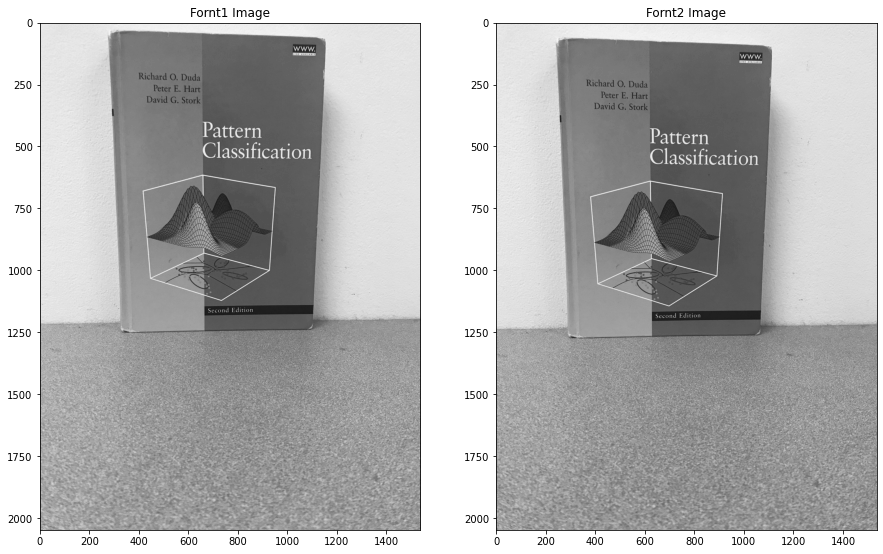

In [ ]:
fig=plt.figure(figsize=(15,12))
fig.add_subplot(1,2,1),plt.imshow(img1,cmap="gray"),plt.title("Fornt1 Image");
fig.add_subplot(1,2,2),plt.imshow(img2,cmap="gray"),plt.title("Fornt2 Image");

Now,  we have to develop a linear model of the camera so that we can calibrate the camera for this. We are going to discuss what's called the forward imaging model, which takes the images from 3D to 2D. We have a world coordinate frame w shown in the picture. For example, we focus our attention on a single point in this world coordinate frame and that point is P. In the world Coordinate frame lies the camera, and the camera is defined by its own coordinate frame c where the Z-axis of the camera coordinate frame is aligned with the optical axis of the camera.
Assume that the effective focal length, which is a distance between the effective central projection and the image plane of the camera, is f. So now if we know the position of the camera coordinate frame with respect to the world coordinate frame, then we can write an expression that takes us all the way from the point P in the world coordinate frame to its projection xi on the image plane. That complete mapping is what we refer to as the camera imaging model. Now, if we give a closer look at the image plane we know the coordinates in terms of millimeters, that is the same units that the point P is defined in the camera coordinate frame. But the image sensor is used to capture the image and this image sensor we know has pixels. And we have to figure out the mapping from the image coordinates in millimeters to pixels. From the above figure we can determine the perspective projection equation, if we consider similar triangle we can write that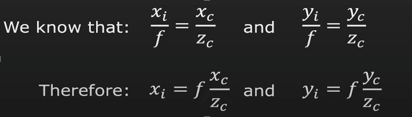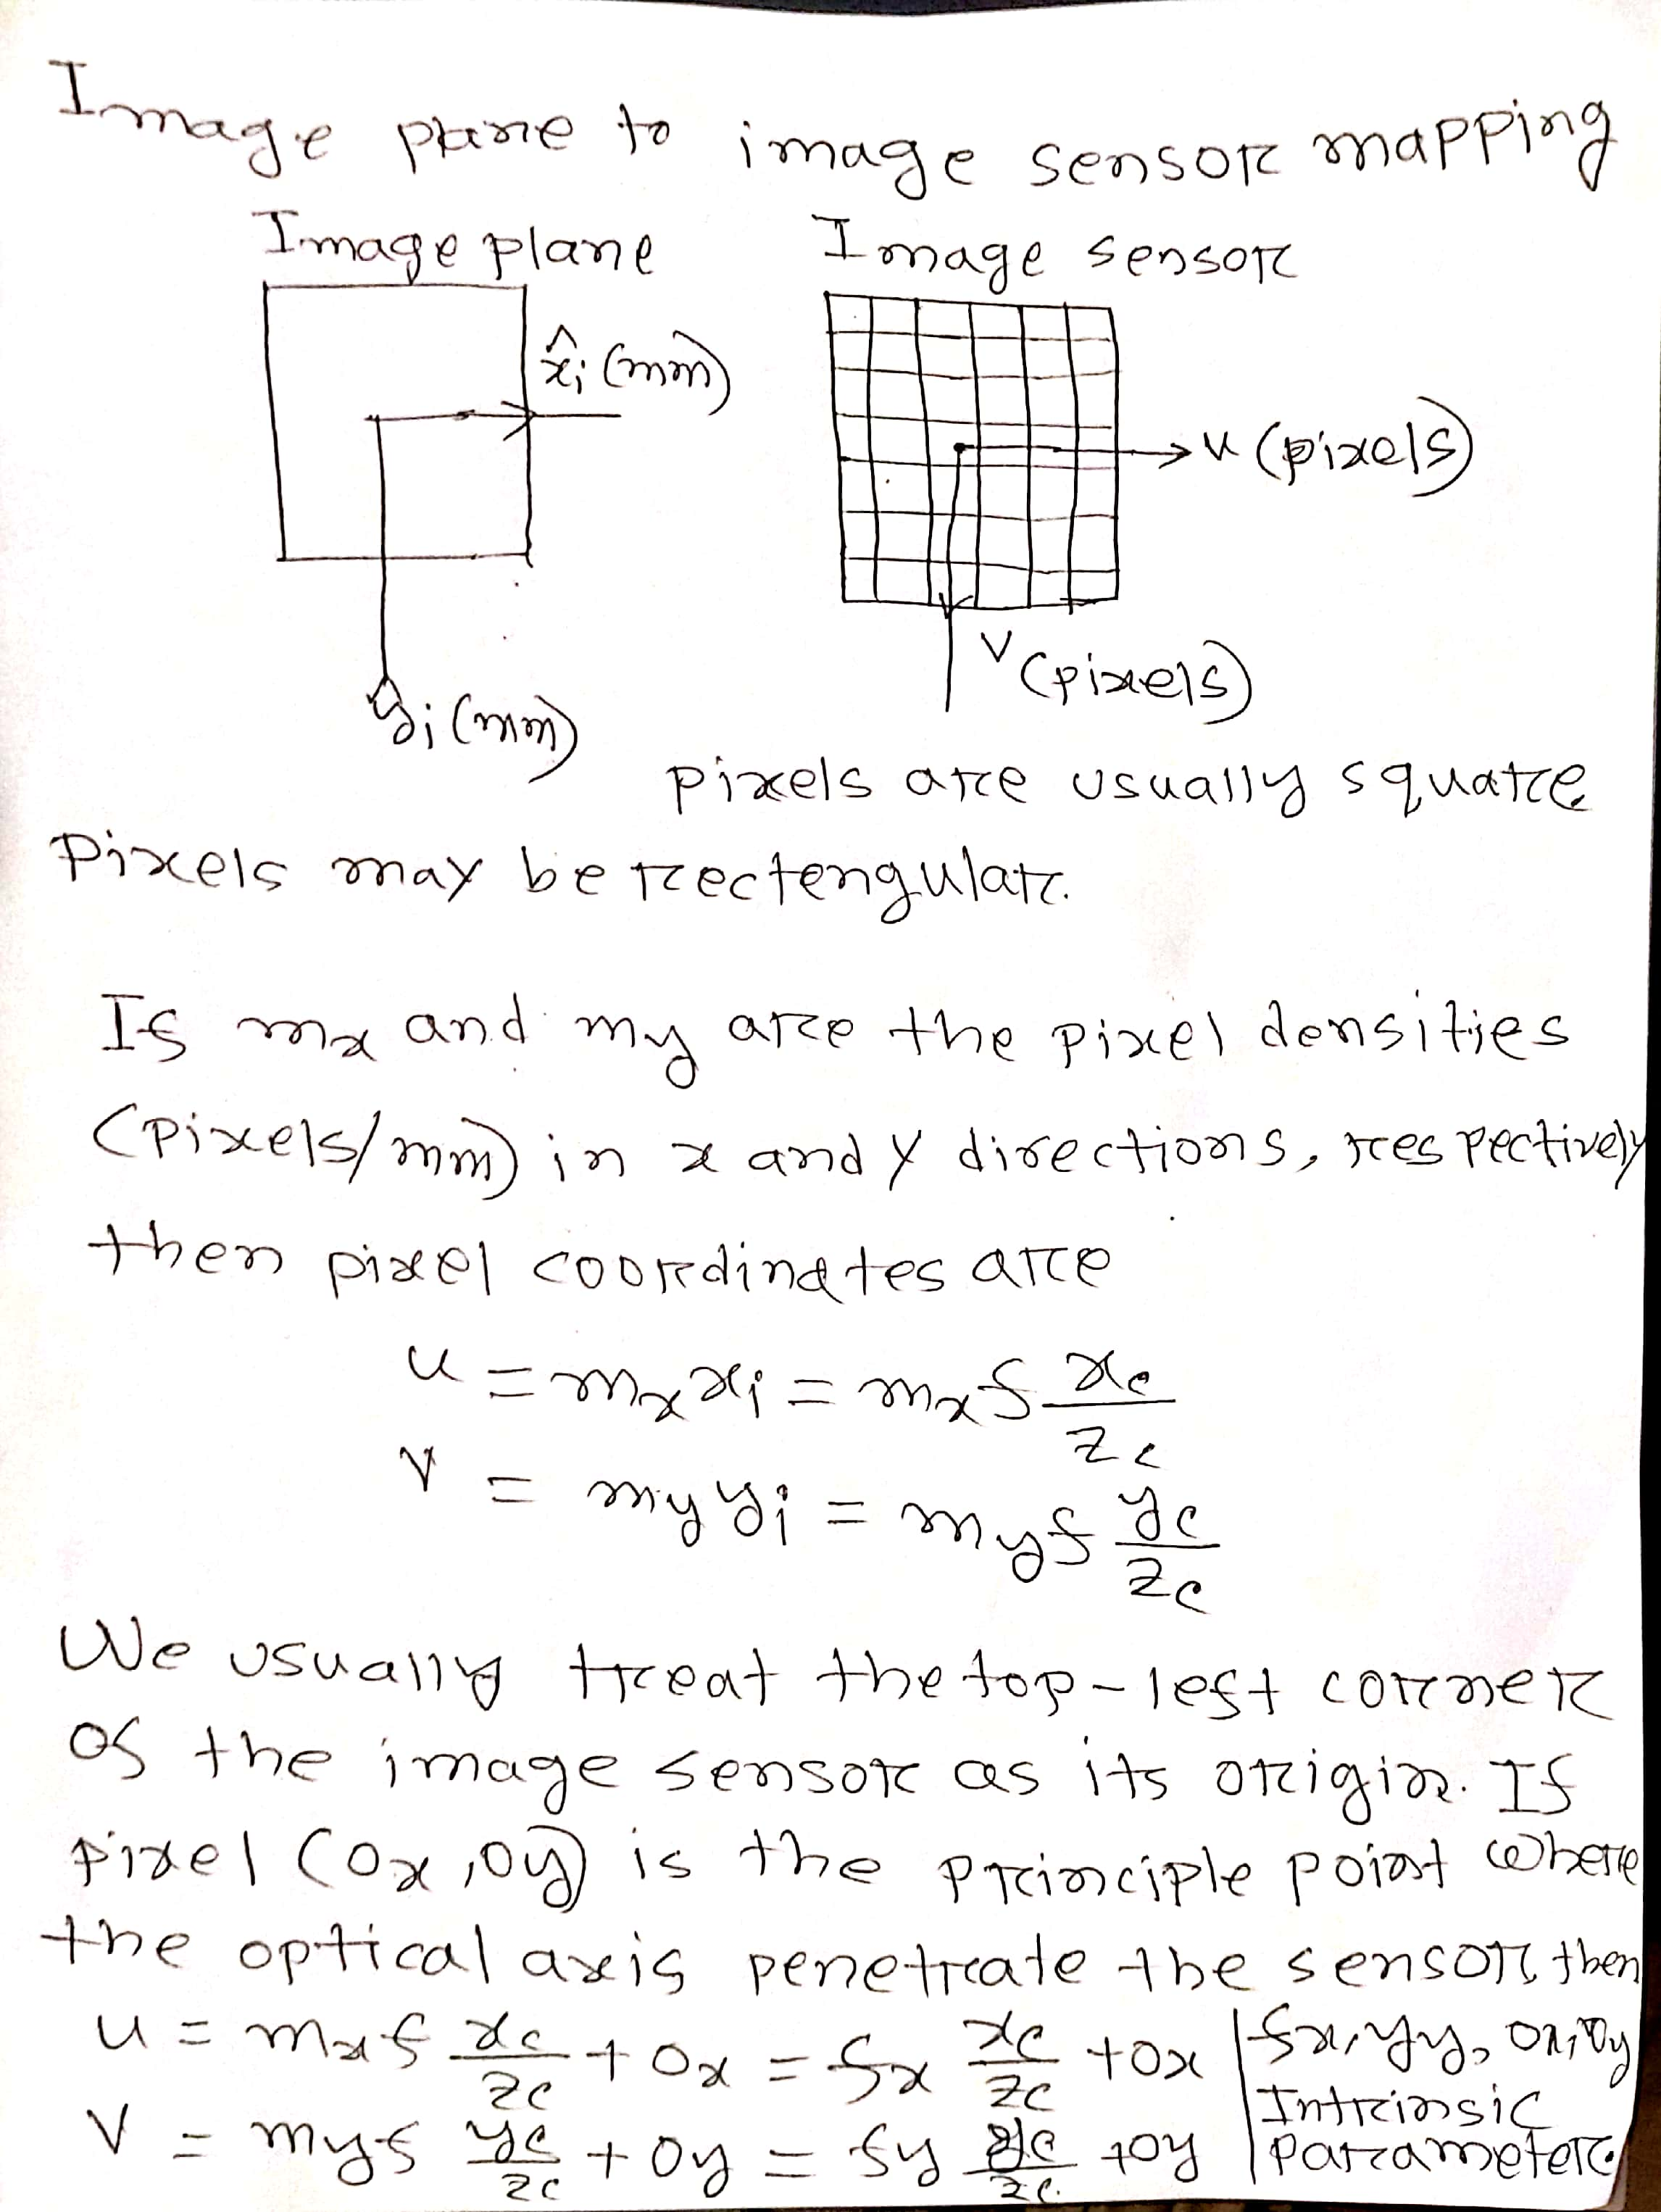)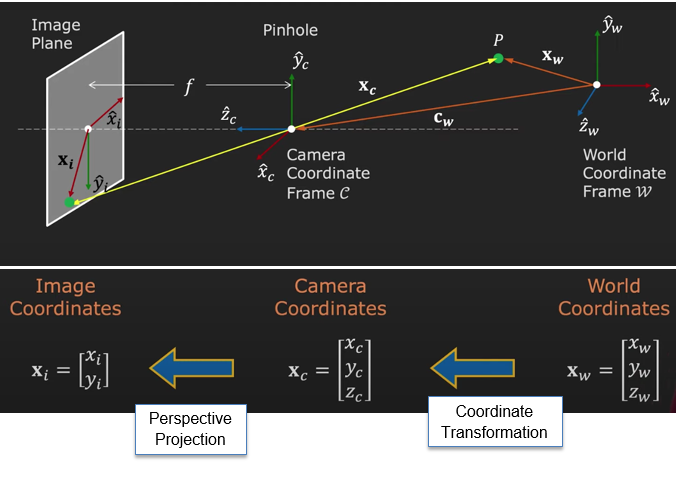

But the perspective projection equations are non-linear. It is beneficial to express them as linear equations. For doing this we have to use Homogeneous Coordinates. This is linear model for perspective projection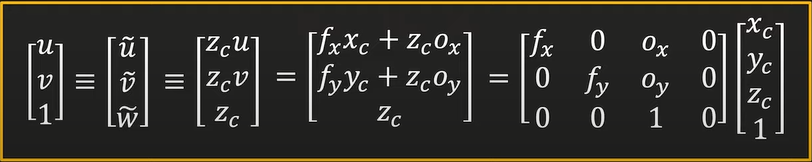

Int he above linear model for perspective projection ther is a matrix that is call intrinsic matrix. If you look at the marked matrix which is three by three we call it the calibration matrix K. This matrix has a very special structure to it. And the structure is that it is an upper right triangular matrix. 
The whole matrix, it's called the Intrinsic Matrix Mint, which is a concatenation of the K matrix and column of zeros right here.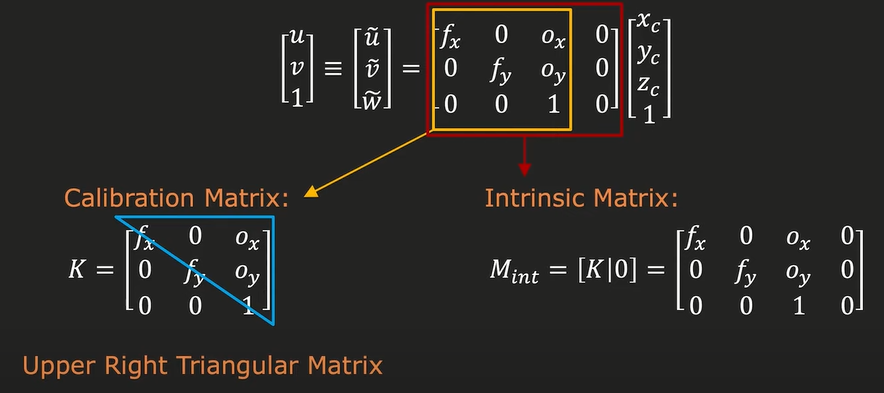

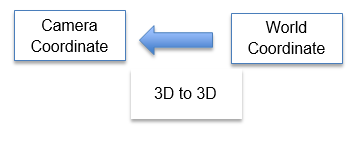

In the above mentioned process we are mapping from camera coordinate to image coordinate. But if we want to mapping from world coordinate to camera coordinate. That can be done by using the position and orientation of the camera coordinate frame with respect to the world coordinate frame.

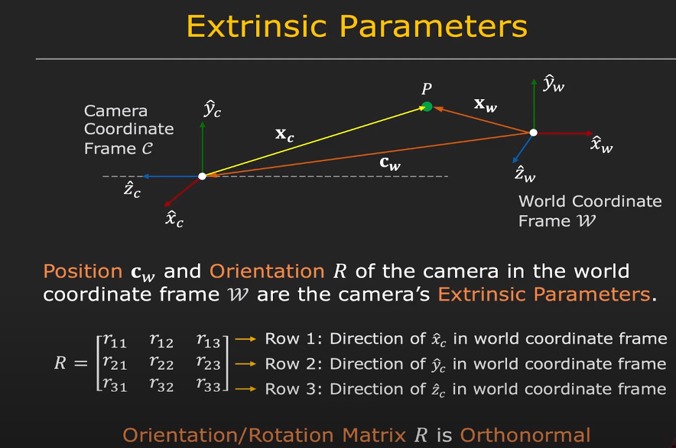


Rotation matrix is an orthonormal matrix. What is orthonormal matrix?
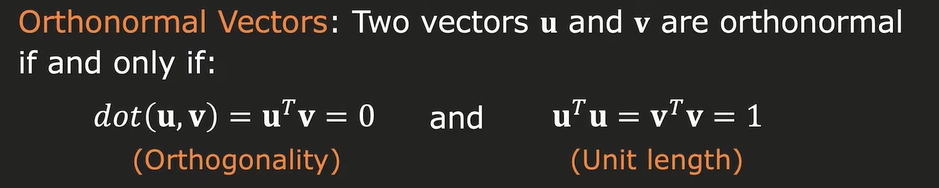

Here, our extrensic parameter (R,$x_c$) of the camera. If we mapped P from world coordinate frame to camera coordinate fram and consider the triangle then, $x_c=R(x_w-c_w)=Rx_w +t), t=-Rc_w$ where t is the translation vector. And we can write this equation as a matrix form,
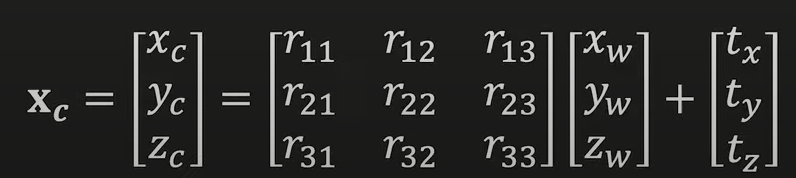

Again, by applying homogeneous coordinate we got,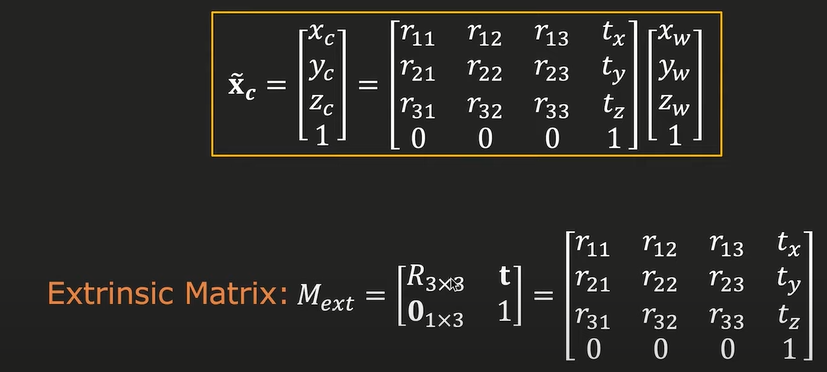

From the slide we can say that, Extrinsic matrix is the combination of both rotation matrix and translation vector.

If we combine this two mapping, mapping a point from the world coordinate to pixel location in the image then we can see the new matrix that is called projection matrix that is the combination of intrinsic and extrensic matrix. This matrix is 3 by 4 matrix. If we want to calibrate the camera we need to know the projection matrix.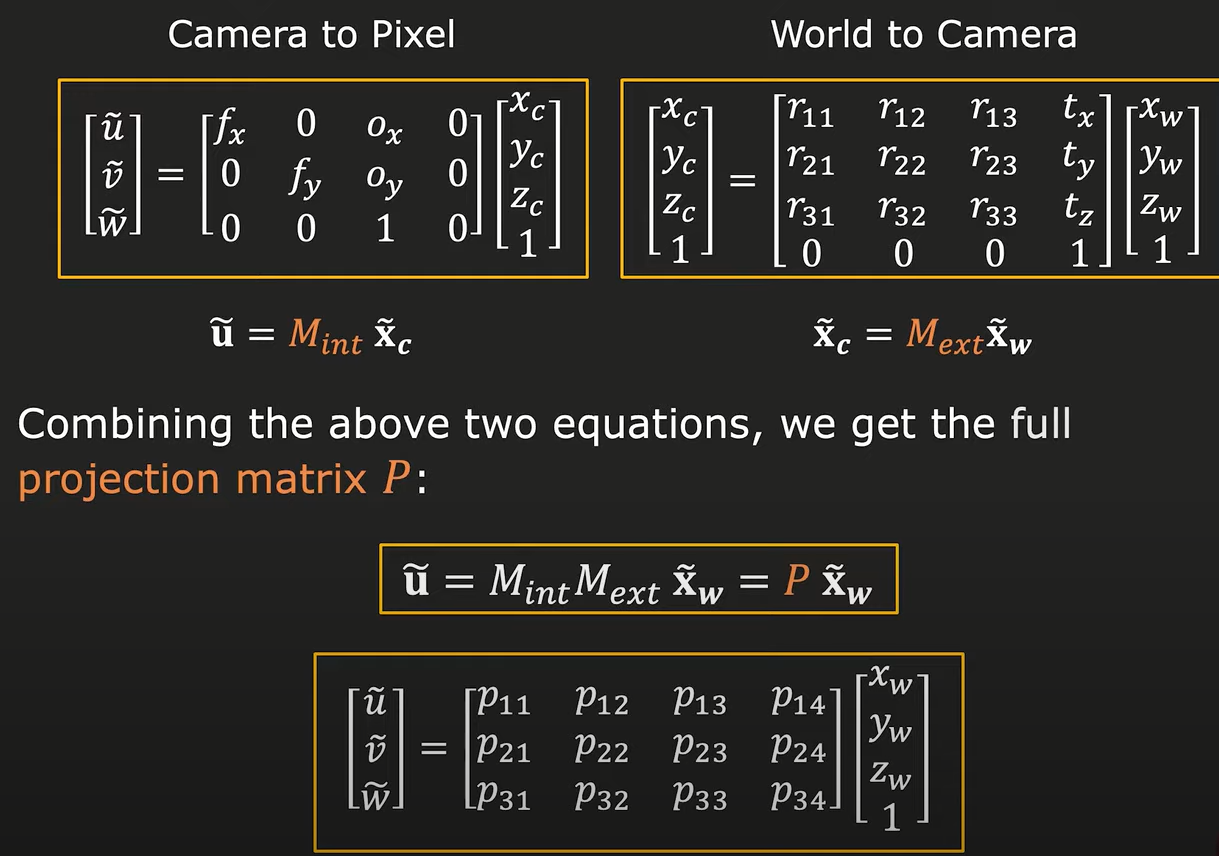

Overall, camera calibration Procedure:

**Step 1:** We have to capture an object with known geometry. 

**Step 2:** Then, we need to identify the the correspondences between 3D scene points and image points.

**Step 3:** For each corresponding point i in the scene and image:
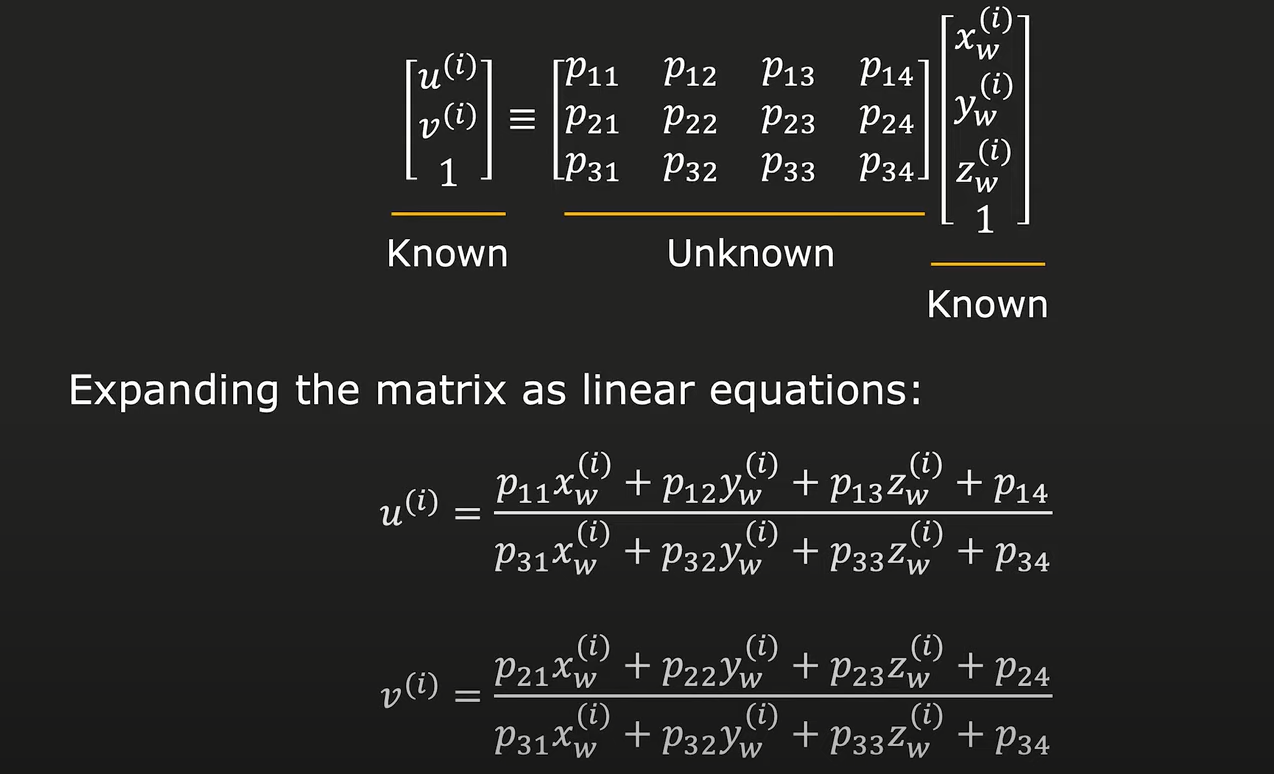

**Step 4:**Rearranging the terms

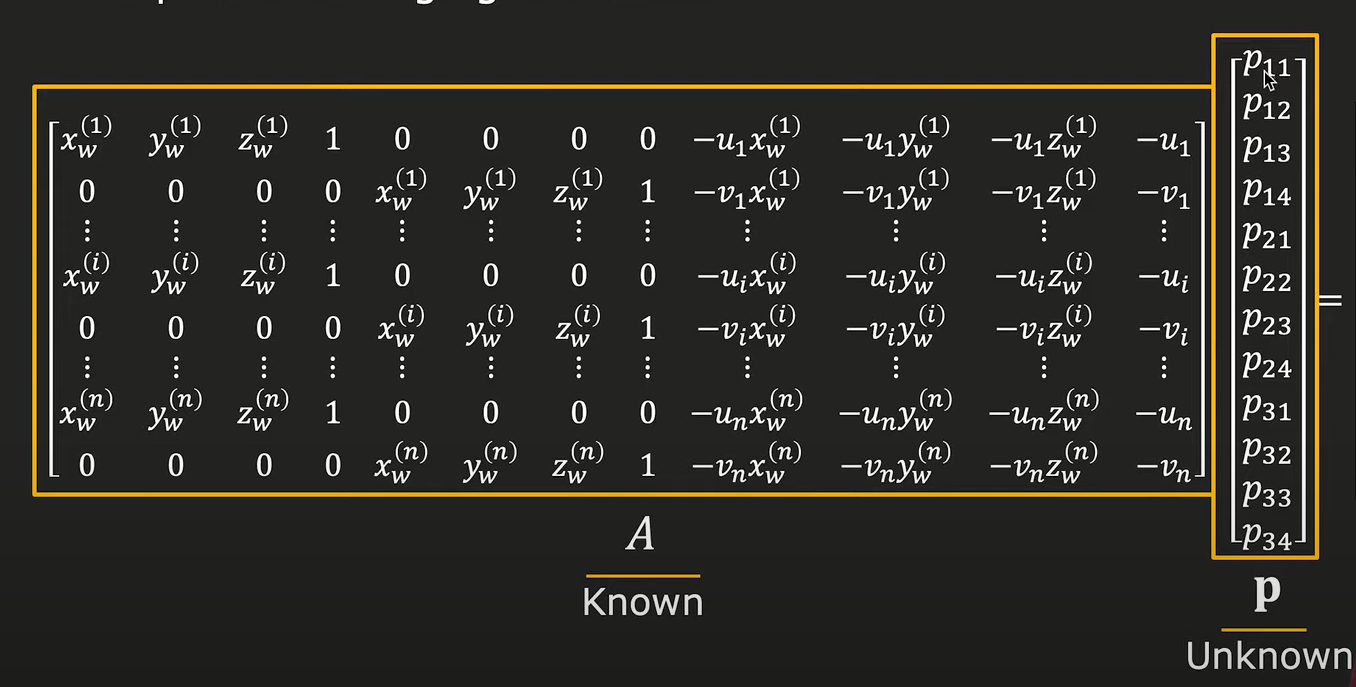

The avobe equation is equal to zeor.

**Step 5:** Solve for p

$AP=0$

Projection matrix acts on homogenous coordinates. Therefore, projection matrices P and kP produce the same homogeneous pixel coordinates. Projection matrix P is defined only upto a scale. What does that really mean? Scaling projection matrix, omplies simultaneously scaling the word and camera, which doesnot change the image. So, we can say that we can set projection matrix arbitarily.

We now have a calibrated camera. And so now let's look at a simple method for recovering the three-dimensional structure of a scene from two images. We call this simple stereo or horizontal stereo. We call this simple stereo. In order to reconstruct 3-D, we need more information. And we do this in a simple way  is by taking two images, using two cameras or by just using one camera to take one image and then a second image after that. But the two images that we are capturing, that being captured from two different locations.

Let's see a simple example of such system:

Imagine that we have a left camera and a right camera, and the right camera is simply identical to the left camera. But displaced along the horizontal direction by a distance B, which is called a baseline. And this system with a left camera and the right camera is called a simple stereo system. And this type of vision, computer vision, is called binocular vision. It's the kind of vision that we use. We use two eyes to observe depth of points in the scene. So, we have our first camera and our second camera. We are looking at one point in our left camera. That is $u_l, v_l$ that corresponds to an outgoing ray. We don't know where the corresponding scene point lies. But somehow, we can find the corresponding point in the right camera. That is the projection of the same scene point in the right camera. That is a $u_r, v_r$. Now we can shoot out another outgoing ray of from the right camera. And wherever those two rays intersect is where the scene point lies. The physical point lies corresponding to these two image points.That is the idea behind a simple stereo. It is the idea of triangulation. How do we do this? We are going to assume for the moment that we have found the curves that the point corresponding to $u_l and v_l$ in the left image and the point in the right image $u_r, v_r$ has been found using some method.

That's method is called the correspondence problem, let's say, that is given to us. If that is given to us, we essentially have four equations, and we have the perspective projection equations for the left camera with all the known internal parameters. Remember, again, our cameras are calibrated, and we have the same for the right camera with the one important difference that instead of X, where you have X minus B, where B is the baseline. From the slide, here is the example of such system:

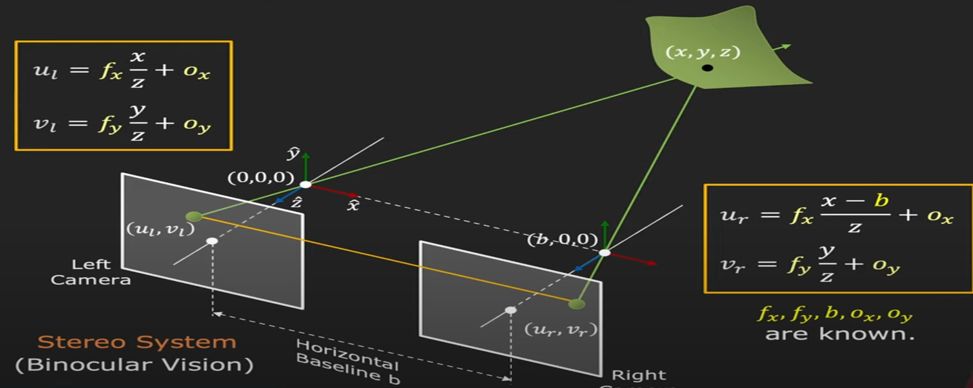

Now, we have these four equations. By simply solving these four equations, we get equations for X, Y and Z. The point Z is important here because that is called the depth of the point in the scene. And the important thing to notice here is that in the denominator for all three of these, we have $u_l$ minus $u_r$. What is ul minus ur? It is the difference in the u coordinate of the same scene point in the two images left and right. And that difference is what's called disparity. So, we have ul minus ur, this disparity is inversely proportional to the depth, Z of the point. That is, if a point is really close to the camera system, the two cameras that we are talking about, then the disparity is going to be large. And as it moves away, the disparity begins to shrink. And as the point goes off to infinity, the disparity is going to zero. What this tells you is that if we have a scene at infinity and if we take two images of the scene, one with a left camera and one with the right camera, doesn't really matter how far these cameras are with respect to each other, what the baseline is, we are going to get two identical images. Now, as the scene gets closer and closer, we are going to see differences in the projections, disparities, and the disparity is going to increase as the depth decreases. The depth Z is inversely proportional to the disparity. And in addition, the disparity itself is proportional to the baseline of the system. This is easy to understand. If you have a very small baseline, we could imagine that the differences between the two images are going to be small as we increase the baseline. The disparity is proportional to the baseline. And this is an important consideration because when we are designing a stereo system, since we want to measure disparity very precisely because that's what gives us depth.
We want to typically use a stereo configuration where the disparity, the baseline is large because the larger the baseline, more precisely, we can make a disparity in measurements.
We know the correspondence between points in the left and right image and we need to find that correspondence somehow. So that is  called stereo matching. Once we find correspondence, then that leads to disparity.
Now, the interesting thing about this the simple stereo system, is that there is no disparity in the V direction, in the vertical direction, because we know that 
 
And they are equal. That means that corresponding points must lie on the same horizontal line in both the images we take image1 and image2. From the slide,

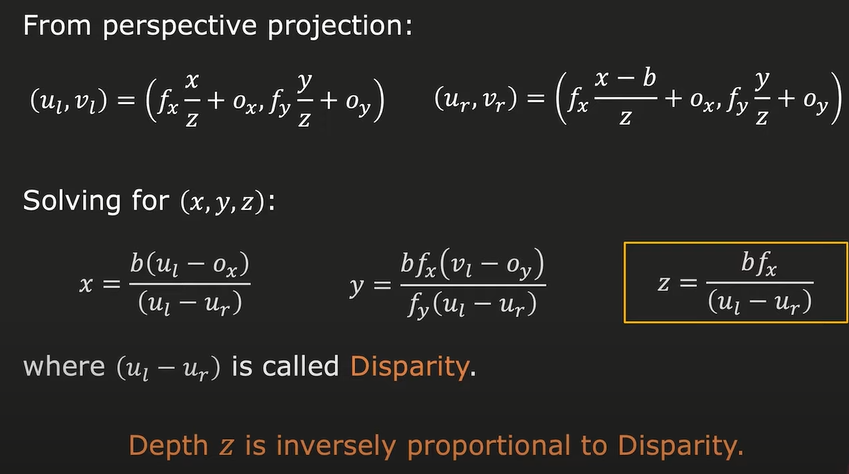

In [ ]:
sift = cv.SIFT_create()

In [ ]:
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [ ]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
good = []
pts1 = []
pts2 = []
for i,(m,n) in enumerate(matches):
  #Apply ratio test
    if m.distance < 0.8*n.distance:
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

In [ ]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
me1= np.mean(pts1,axis=0)
me2 = np.mean(pts2,axis=0)
pts1new = pts1-me1
pts2new = pts2-me2
a1x = np.sqrt(2/np.std(pts1new[:,0]))
a1y = np.sqrt(2/np.std(pts1new[:,1]))
a2x = np.sqrt(2/np.std(pts2new[:,0]))
a2y = np.sqrt(2/np.std(pts2new[:,1]))
t1 = np.array([[a1x,0,-a1x*me1[0]],[0,a1y,-a1y*me1[1]],[0,0,1]])
t2 = np.array([[a2x,0,-a2x*me2[0]],[0,a2y,-a2y*me2[1]],[0,0,1]])
ones = np.ones(pts1.shape[0])[:,np.newaxis]
old_c1 = np.hstack((pts1,ones)).T
old_c2 = np.hstack((pts2,ones)).T
new_c1 = np.dot(t1,old_c1).T
new_c2 = np.dot(t2,old_c2).T
new_c1 = new_c1[:,:2]
new_c2 = new_c2[:,:2]
a = new_c1
b = new_c2
A =[]

In [ ]:
for i in range(8):
    A.append([b[i][0]*a[i][0],b[i][0]*a[i][1],b[i][0], b[i][1]*a[i][0], b[i][1]*a[i][1], b[i][1], a[i][0], a[i][1], 1])
u, s, v = np.linalg.svd(A, full_matrices=True)
F_hat = v[:,8].reshape(3,3)
u2, s2, v2 = np.linalg.svd(F_hat, full_matrices=True)
s2[2]= 0
f = np.dot(u2,np.dot(np.diag(s2),v2))
T2t = np.transpose(t2)
Tt1 = t1
F = np.matmul(T2t,f,Tt1)
F=np.true_divide(F,F[2,2])

Our goal is to find the relative position and orientation of one camera with respect to the other. The relative position and orientation between the two cameras are completely described by what is called the epipolar geometry of the stereo system. That is the process of calibrating an uncalibrated stereo system. The relative position and orientation between the two cameras are completely described by what is called the epipolar geometry of the stereo system.


In the picture, we have our left camera and our right camera. The left camera has its own 3D coordinate frame position at ol. The right camera has a 3D coordinate frame positioned at or. It is the translation of rotation of one frame with respect to the other frame given by t and R right here. This is what we are trying to compute in terms of calibrating the system.

**And the first concept is what is epipole?**

If welook at the right camera, the projection of the center of the left camera onto the right camera image and the projection of the center of the right camera on the left camera image. These are referred to as the epipoles of the stereo system. Here, el and er the epipole of the stereo system. And for any given stereo system, it has a unique pair of el and er.
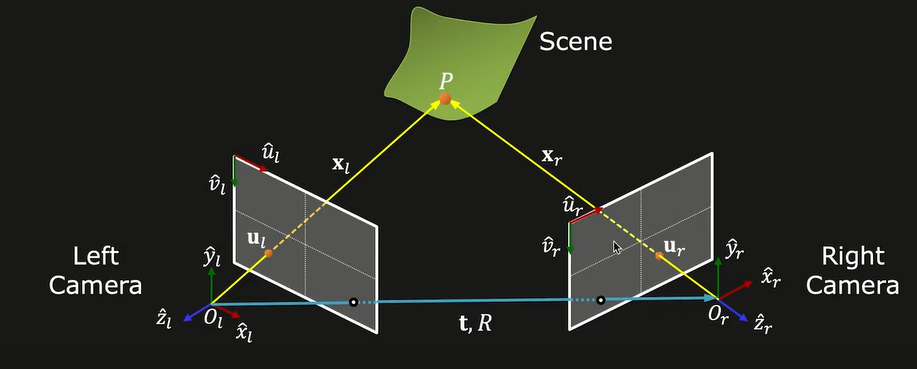 


We are actually going to use the epipolar plane to set up what's called an epipolar constrained. There is a vector that is normal to this epipolar plane, we call that n and we can calculate that normal vector. That is just a cross product of the unknown translation vector and the vector that corresponds to the point P in the left coordinate frame.
That's $x_l$. So t cross xl. We can say is a normal to the epipolar plane.
We know that the normal vector should be perpendicular to $x_l$,  that is the dot product of n and $x_l$ should be equal to zero.
That is, our  epipolar constrained. From the slide,
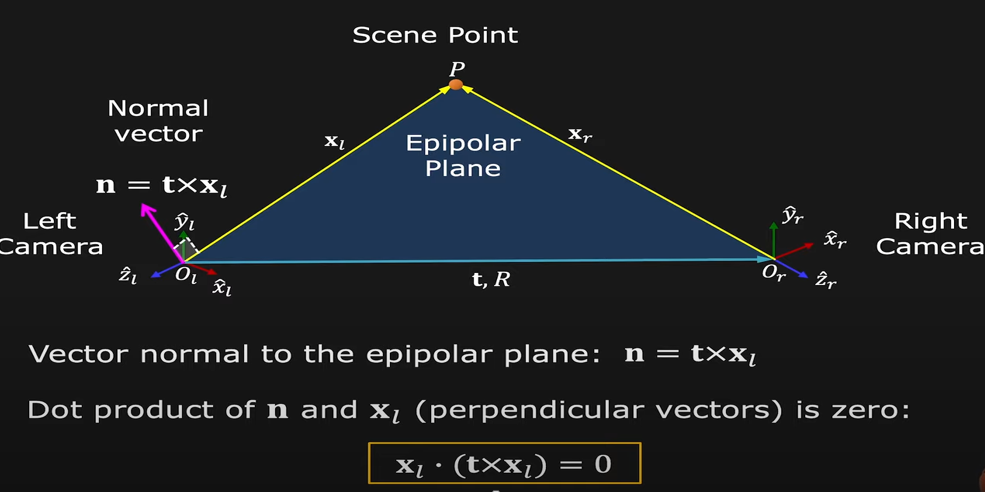

Then if we simplify the slides equation that is epipolar constraint we get,
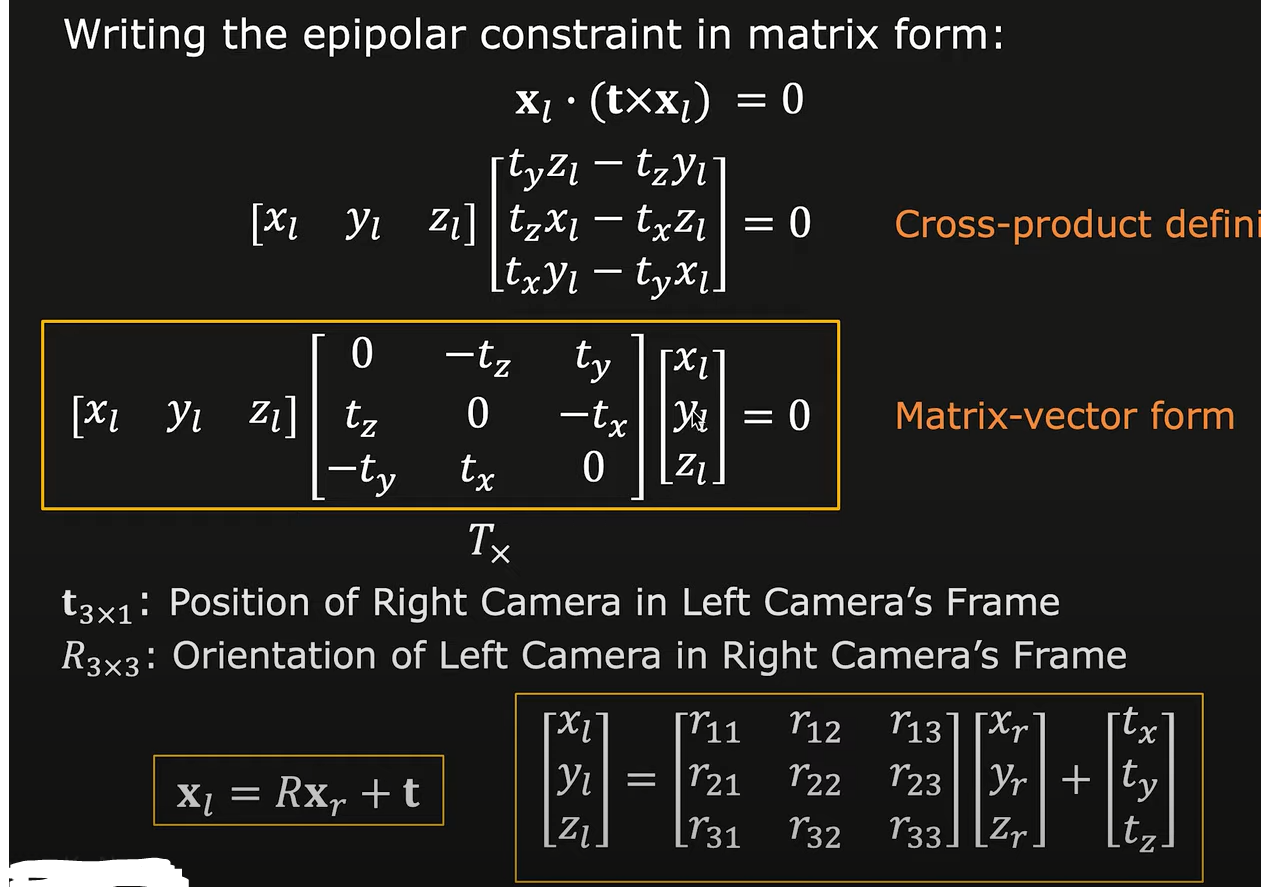

If we substitute xl from the above equation that is matrix vector form then we got,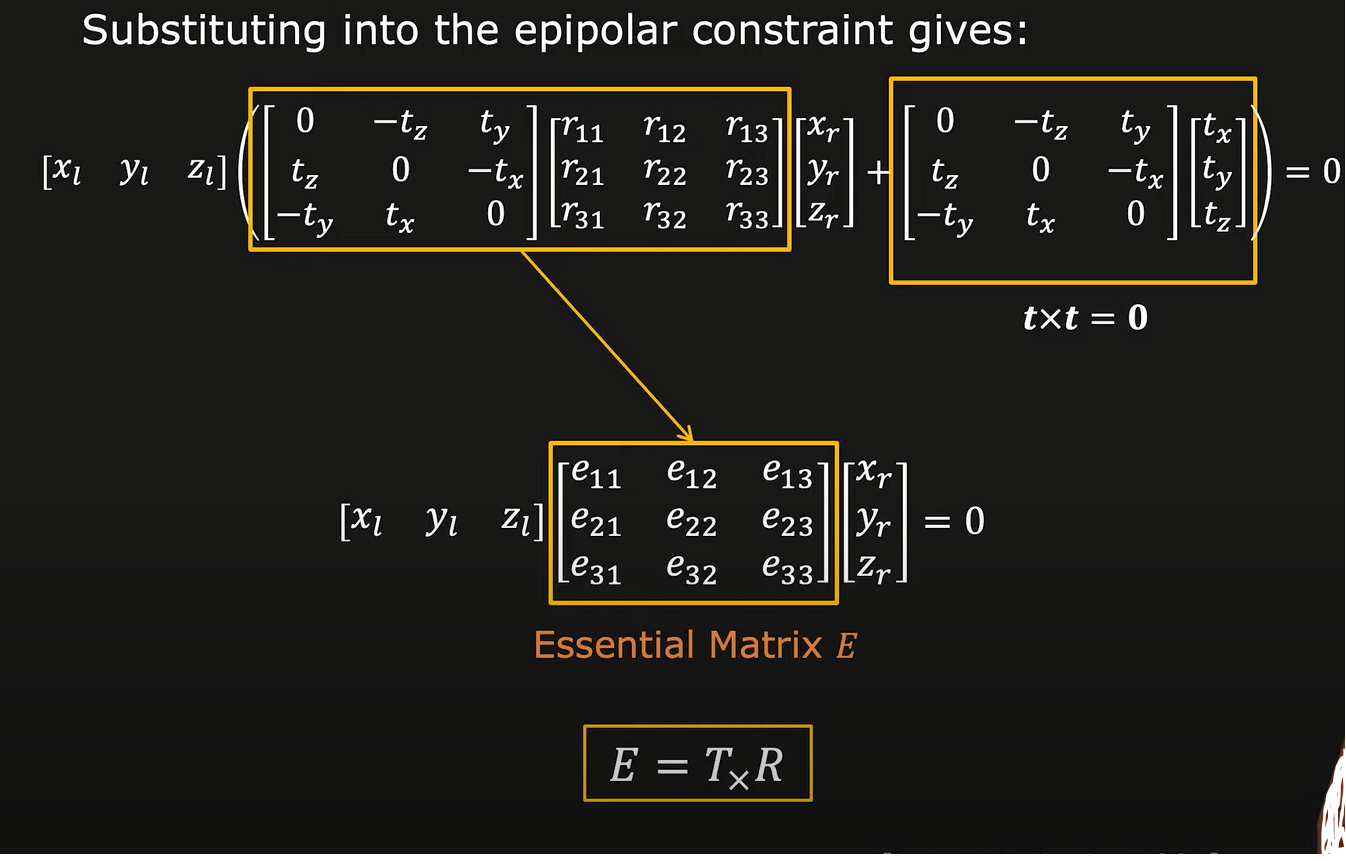

From the slide, we can say that, the essential matrix is the product of the translation matrix and the rotation matrix.
This is an interesting matrix because it has some interesting properties.
So one of the interesting things about the essential matrix is that it's actually
possible to decompose it into the translation matrix and the rotation matrix.
And notice that t has a very special structure.
It is actually a skew symmetric matrix, which simply means that if we take any element, aij, aij is going to be equal to minus aji. That is very important.
And R we know as a rotation matrix in the rotation matrix, is an ortho normal matrix. If we have a product of a skew symmetric matrix with an orthonormal matrix, it turns out that from their product,
we can decompose them the product into the two elements, the two matrices using singular value decomposition.
This is a well-known result in linear algebra.
That is what makes the essential matrix really special in that if we can actually compute the essential matrix,
we can then calculate the translation T and the rotation R, which is exactly what we are looking for.
Once you have t and R, we have calibrated our uncalibrated stereo.


Unfortunately we don't have $x_l$ and $x_r$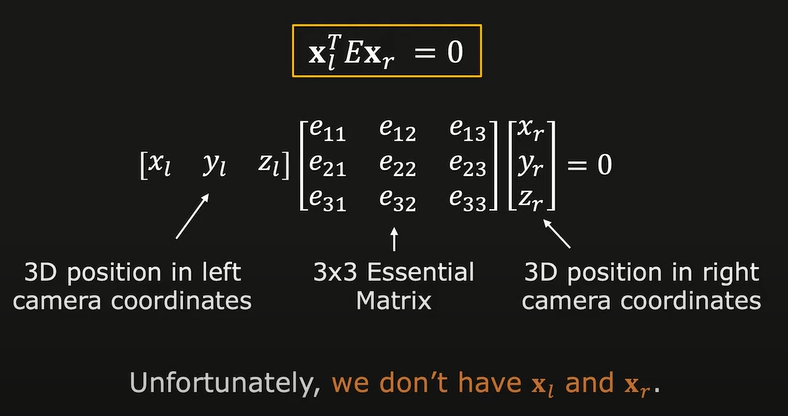

But we do know corresponding points in image cooedinates. By using the perspective projection of the right and left camera we can write,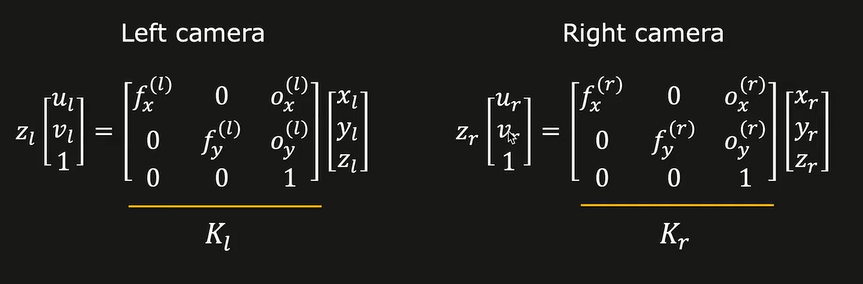



If we transpose the above equation,
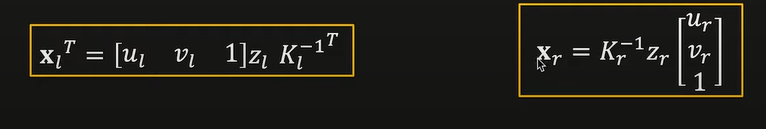

If we substitute the above two in the epipolar constraint equation then we got from the slide,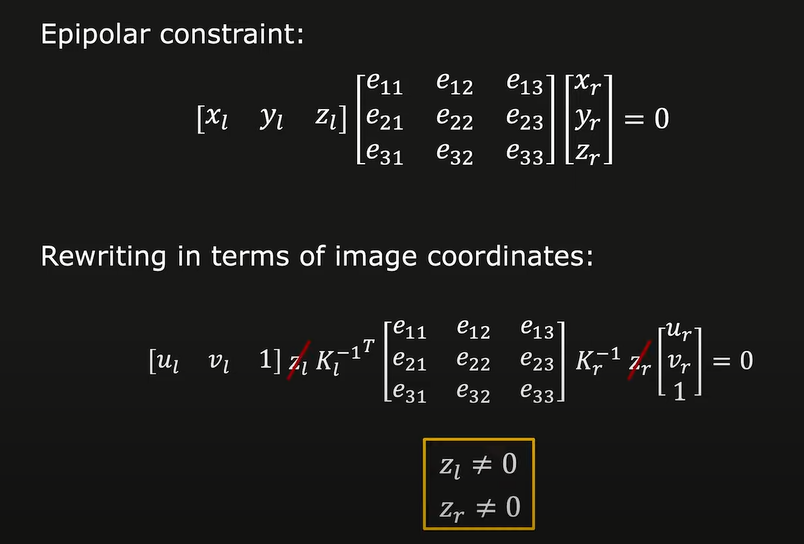

we still have Zl and Zr, which are 3D coordinates.
And so those are unknown, but they still remain in the equation.
If we consider Zl and Zr those in the depths of the same scene point in the two cameras.
Now remember, the center of the camera coordinate frame is placed at the effective pinhole of the camera itself.
So therefore, the depth of any point cannot be zero and it can be zero only if that point lies at the center of projection.
Since the world lies in front of the camera, we can safely assume that Zl and Zr cannot be equal to the zero.


Rewriting the above equation we got,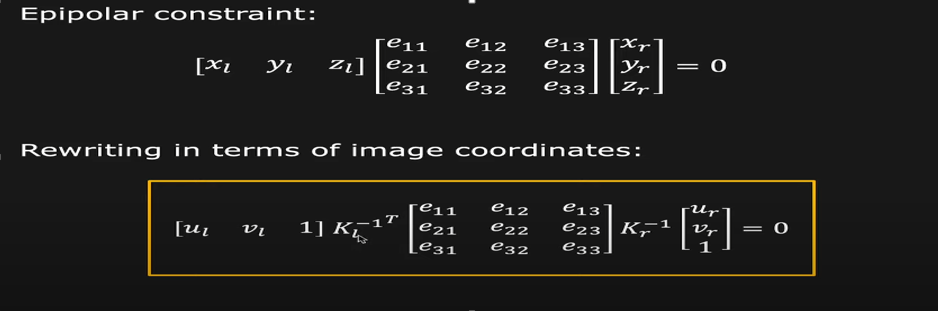

When we only have scene points expressed in terms of the image coordinates ul and ur.
We have the known internal parameters in the camera matrix Kl, camera matrix Kr and we have our unknown essential Matrix three by three Matrix. Now we can imagine that the product of these are all Kl, Kr and essential matrix also three by three matrices.

We can say that the product of all of this is another three-by-three matrix and that three by three matrix is what we call the fundamental matrix F.
We have a very simple expression for our epipolar constrained.
We have ul transpose times our fundamental matrix, which is a three by three matrix times ur is equal to zero.
 
And we have an expression where we have an unknown, which is your fundamental matrix or what is known to us here on the image coordinates ul and ur.
The fact is that if we can find the fundamental matrix using this constraint, then once we find that it is very easy for us to find the essential matrix, because remember, we know Kl and Kr internal parameters.

And once we find the essential matrix, as we mentioned earlier, using singular value decomposition and because the T matrix, the translation matrix is a skew symmetric matrix and are the rotation matrix is an orthonormal matrix,
we can apply singular value decomposition to then decompose into its parts. And so we can find t and R.

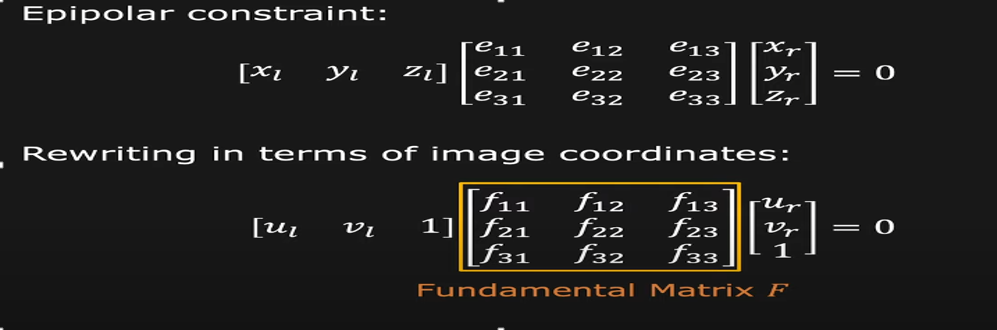


# Fundamental Matrix

In [ ]:
F

array([[-2.55549327e-07, -2.92479081e-06, -3.57901963e-05],
       [ 1.31472641e-05,  4.09793407e-04, -4.30406332e-04],
       [-1.71818815e-02, -5.85493408e-01,  1.00000000e+00]])

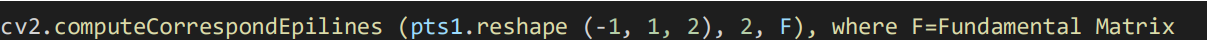

I have used above function to come up with the lines required to plot in the images read previously. These 
lines are then plotted on the image using matplotlib. In addition, we set circles at desired points in 
the Image with commands like cv2.circle, cv2.lines etc. This is how the lines are plotted on the image 
using the Fundamental Matrix.

In [ ]:
def drawlines(img1,img2,lines,pts1,pts2):
    r,c = img1.shape
    img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

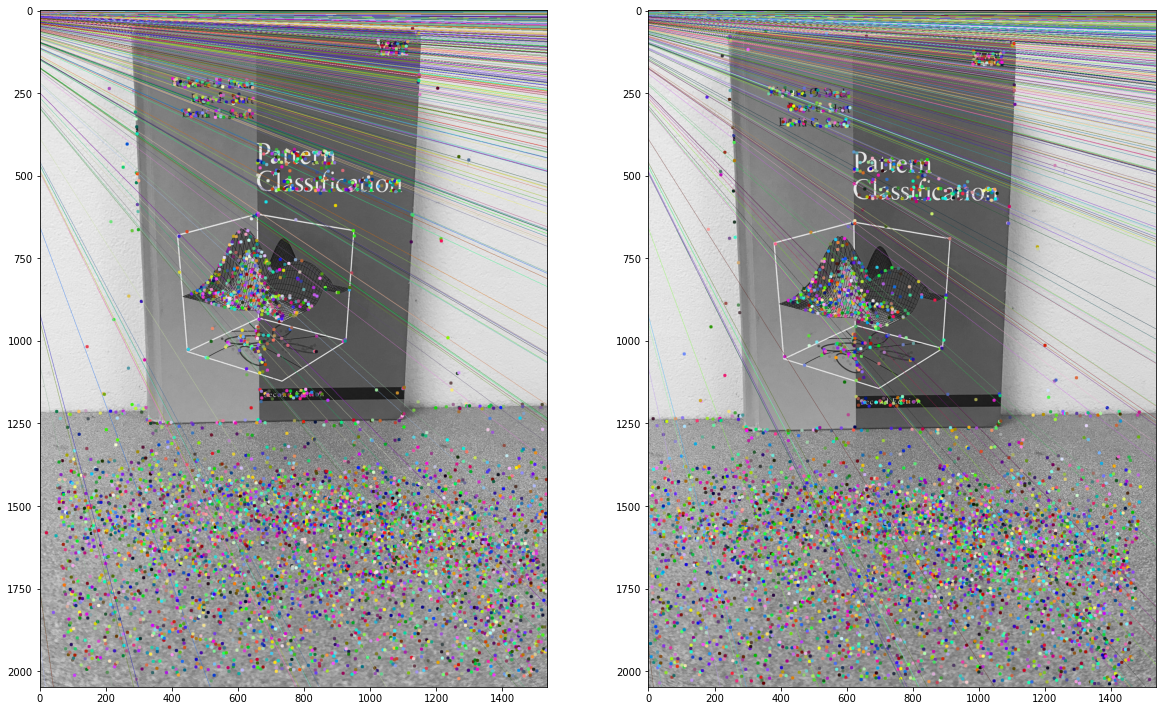

In [ ]:
lines1 = cv.computeCorrespondEpilines(pts1.reshape(-1,1,2), 2, F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)
lines2 = cv.computeCorrespondEpilines(pts1.reshape(-1,1,2), 2,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)
fig=plt.figure(figsize=(20,20))
fig.add_subplot(121),plt.imshow(img5)
fig.add_subplot(122),plt.imshow(img3)
plt.show()

We have camera calibration matrix tht is provided. The camera calibration matrix is a 3x3 or 3x4 matrix containing 5 parameters.The parameters $α_x=f.m_x$ and $α_y=f.m_y$ represent focal length in terms of pixels, where $m_x$ and $m_y$ are the scale factors relating pixels to distance/pixel density and $f$ is the focal length. $γ$ represents the skew coefficient between the x and the y axis, and is often 0.  $u_0$ and $v_0$ is the principal point.

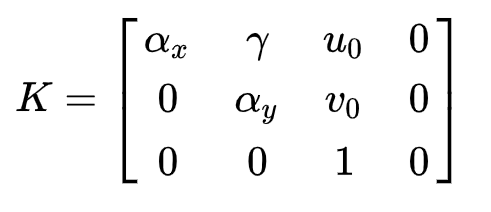


Here, the Essential matrix is calculated using the Fundamental matrix and the intrinsic
camera parameters. I will give furthe mathenatical explanation for this.


## Essential Matrix

In order to carry out this part, firstly I need to calculate the K matrices separately from both the 
images separately. But I have only one K metrix. I think we need to consider for both images the K metrix is same. When I get the K 
matrices, I take the inverse of one, multiply it with the F matrix, and multiply the same K matrix with 
it. Therefore, I generate the E matrix. 

In [ ]:
K = np.array([[1497.44,0,767.17],[0,1508.57,1081.55],[0,0,1]])
E = K.T.dot(F.dot(K))

In [ ]:
E

array([[-5.73025042e-01, -6.60708215e+00, -5.08402964e+00],
       [ 2.96995784e+01,  9.32601051e+02,  6.83182836e+02],
       [-4.72967591e+00, -2.18026322e+02, -1.58227263e+02]])

S Decomposed E. A scalar struct with the following fields:
 R1 One possible rotation matrix, 3x3.
 R2 Another possible rotation matrix, 3x3.
 t One possible translation, 3x1.


Decompose an essential matrix E using SVD decomposition. Generally 4 possible poses exists for a given E. They are [R1,t], [R1,-t], [R2,t], [R2,-t]. By decomposing E, we can only get the direction of the translation.


In [ ]:
S = cv.decomposeEssentialMat(E)

In [ ]:
S

(array([[ 0.47204487,  0.63814588, -0.60822979],
        [ 0.86948644, -0.45087608,  0.20175255],
        [-0.14548871, -0.62408381, -0.76769293]]),
 array([[ 0.47590533,  0.36380449, -0.80072493],
        [-0.82646699,  0.49634614, -0.2656931 ],
        [ 0.30077639,  0.78821749,  0.53688617]]),
 array([[-0.98585845],
        [-0.04473979],
        [-0.16149759]]))

If I perform the Singular value Decomposition the it shows different result when we tear it appart to rotation and translation matrix.

# Estimating the actual height and width of the object

Calculating the distance between our camera and an object is analogous to measuring the size of objects in an image; in both situations, we must create a ratio that estimates the number of pixels per metric. This overall process is called pixels per metric ratio.In order to determine the size of an object in an image, we first need to perform a “calibration”.We should know the dimensions of this object in terms of width or height in a measurable unit such as millimeters, inches.If we give an example for understanding the pixels per metric, our book image width is provided 7.7 inches and suppose that our object_width measured in pixels is computed be 150 pixels wide. So, the pixels per metric =150 pixels/7.7 inches=19.48 pixels pr inches. That means 19.48 pixels per every 7.7 inches.

In [ ]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2

The function called midpoint , which as the name suggests, is used to compute the midpoint between two sets of (x, y)-coordinates.

In [ ]:
def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)


We can now load our image and preprocess it. convert it to grayscale, and then 
smooth it using a Gaussian filter.





In [ ]:
# load the image, convert it to grayscale, and blur it slightly
# convert it to grayscale, and then smooth it using a Gaussian filter.
image = cv2.imread('/content/drive/MyDrive/Project/front1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)

We then perform edge detection along with a dilation + erosion to close any gaps in between edges in the edge map

In [ ]:
# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
edged = cv2.Canny(gray, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

Find contours that correspond to the objects in our edge map

In [ ]:
# find contours in the edge map
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

These contours are then sorted from left-to-right.

In [ ]:
#loop over the contours individually
for c in cnts:
	# if the contour is not sufficiently large, ignore it
	if cv2.contourArea(c) < 100:
		continue
	# compute the rotated bounding box of the contour
	orig = image.copy()
	box = cv2.minAreaRect(c)
	box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
	box = np.array(box, dtype="int")
 	# order the points in the contour such that they appear
	# in top-left, top-right, bottom-right, and bottom-left
	# order, then draw the outline of the rotated bounding
	# box
	box = perspective.order_points(box)
	cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
 	# loop over the original points and draw them
	for (x, y) in box:
		cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)

In [ ]:
# unpack the ordered bounding box, then compute the midpoint
# between the top-left and top-right coordinates, followed by
# the midpoint between bottom-left and bottom-right coordinates
(tl, tr, br, bl) = box
(tltrX, tltrY) = midpoint(tl, tr)
(blbrX, blbrY) = midpoint(bl, br)
# compute the midpoint between the top-left and top-right points,
# followed by the midpoint between the top-righ and bottom-right
(tlblX, tlblY) = midpoint(tl, bl)
(trbrX, trbrY) = midpoint(tr, br)
# draw the midpoints on the image
cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
# draw lines between the midpoints
cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),(255, 0, 255), 2)
cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),(255, 0, 255), 2)

array([[[215, 234, 239],
        [214, 233, 238],
        [213, 232, 237],
        ...,
        [213, 232, 237],
        [213, 232, 237],
        [214, 233, 238]],

       [[216, 235, 240],
        [216, 235, 240],
        [215, 234, 239],
        ...,
        [218, 237, 242],
        [220, 239, 244],
        [221, 240, 245]],

       [[216, 235, 240],
        [216, 235, 240],
        [215, 234, 239],
        ...,
        [219, 238, 243],
        [221, 240, 245],
        [222, 241, 246]],

       ...,

       [[151, 149, 149],
        [151, 149, 149],
        [154, 152, 152],
        ...,
        [166, 166, 166],
        [173, 173, 173],
        [178, 178, 178]],

       [[161, 159, 159],
        [150, 148, 148],
        [148, 146, 146],
        ...,
        [185, 185, 185],
        [191, 191, 191],
        [194, 194, 194]],

       [[175, 173, 173],
        [155, 153, 153],
        [145, 143, 143],
        ...,
        [182, 182, 182],
        [181, 181, 181],
        [179, 179, 179]]

In [ ]:
# compute the Euclidean distance between the midpoints
dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
# if the pixels per metric has not been initialized, then
# compute it as the ratio of pixels to supplied metric
# (in this case, inches)


In [ ]:
pixelsPerMetric = dB /7.7

In [ ]:
# compute the size of the object
dimA = dA / pixelsPerMetric
dimB = dB / pixelsPerMetric
# draw the object sizes on the image
cv2.putText(orig, "{:.1f}in".format(dimA),
  (int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX,
  0.65, (255, 255, 255), 2)
cv2.putText(orig, "{:.1f}in".format(dimB),
  (int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX,
  0.65, (255, 255, 255), 2)


array([[[215, 234, 239],
        [214, 233, 238],
        [213, 232, 237],
        ...,
        [213, 232, 237],
        [213, 232, 237],
        [214, 233, 238]],

       [[216, 235, 240],
        [216, 235, 240],
        [215, 234, 239],
        ...,
        [218, 237, 242],
        [220, 239, 244],
        [221, 240, 245]],

       [[216, 235, 240],
        [216, 235, 240],
        [215, 234, 239],
        ...,
        [219, 238, 243],
        [221, 240, 245],
        [222, 241, 246]],

       ...,

       [[151, 149, 149],
        [151, 149, 149],
        [154, 152, 152],
        ...,
        [166, 166, 166],
        [173, 173, 173],
        [178, 178, 178]],

       [[161, 159, 159],
        [150, 148, 148],
        [148, 146, 146],
        ...,
        [185, 185, 185],
        [191, 191, 191],
        [194, 194, 194]],

       [[175, 173, 173],
        [155, 153, 153],
        [145, 143, 143],
        ...,
        [182, 182, 182],
        [181, 181, 181],
        [179, 179, 179]]

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4a84f70910>,
 <matplotlib.image.AxesImage at 0x7f4a84f70190>)

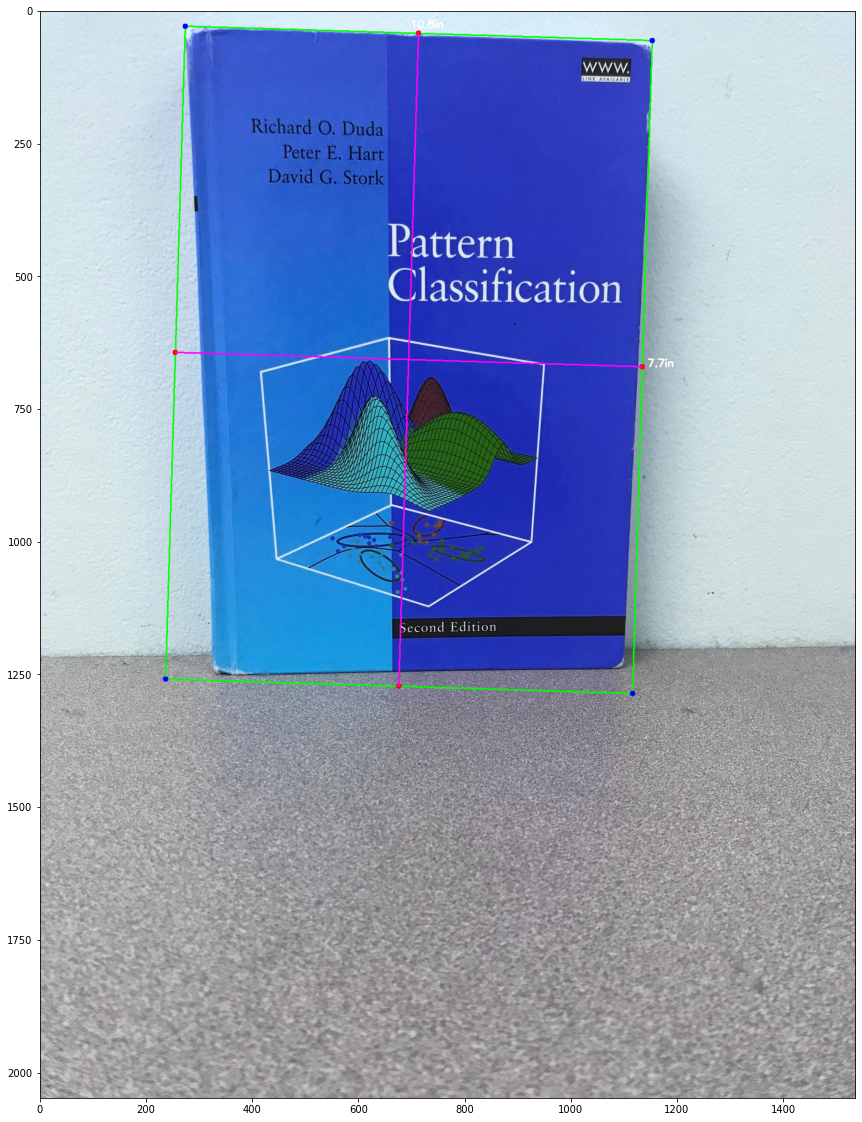

In [ ]:
fig=plt.figure(figsize=(20,20))
fig.add_subplot(111),plt.imshow(orig)

By observing the above figure we can say that the width of the image is 7.7 inches and height of the image is 10.8 inches.